<a href="https://colab.research.google.com/github/xaldoxxx/traderman/blob/main/talib_detector_de_patrones_de_vela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

In [ ]:
!pip install ccxt

In [ ]:
# esto es de medium https://medium.com/@deepml1818/real-time-cryptocurrency-trading-bot-candlestick-pattern-detection-with-python-and-ccxt-4e23e400dcff
# pero mi codigo esta mejor
import ccxt
import talib
import pandas as pd
import time

# Function to fetch live candlestick data
def fetch_candles(symbol, timeframe, limit=100):
    exchange = ccxt.binance()  # Replace with your desired exchange
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Function to check for candlestick patterns
def find_candle_pattern(df, pattern):
    pattern_function = getattr(talib, pattern)
    result = pattern_function(df['open'], df['high'], df['low'], df['close'])
    return result

# Main function
def main():
    symbol = 'BTC/USDT'  # Replace with the trading pair you're interested in
    timeframe = '1m'     # Replace with the desired timeframe

    while True:
        try:
            # Fetch live candlestick data
            df = fetch_candles(symbol, timeframe)

            # Check for a specific candlestick pattern (e.g., 'CDLDOJI' for Doji pattern)
            pattern = 'CDLDOJI'
            pattern_result = find_candle_pattern(df, pattern)

            # Print the result
            if pattern_result.iloc[-1] != 0:
                print(f'{pattern} detected at {df["timestamp"].iloc[-1]}')

            # Sleep for a few seconds before fetching the next set of data
            time.sleep(10)

        except Exception as e:
            print(f"Error: {e}")
            # Handle the error, sleep, or implement a retry mechanism if needed

if __name__ == "__main__":
    main()

In [ ]:
# este es mi codigo ... detectordepatronesdevalas
# busca entre todos los patrones que puede detectar talib
# este codigo es un detector de patrones de velaas

import yfinance as yf
import talib
import pandas as pd
from tqdm import tqdm
import time

# Función para descargar datos históricos de velas usando yfinance
def obtener_datos_velas(symbol, intervalo_tiempo, fecha_inicio, fecha_fin):
    df = yf.download(symbol, start=fecha_inicio, end=fecha_fin, interval=intervalo_tiempo)
    return df

# Función para verificar patrones de velas
def verificar_patron_vela(df, patron):
    funcion_patron = getattr(talib, patron)
    resultado = funcion_patron(df['Open'], df['High'], df['Low'], df['Close'])
    return resultado

# Función principal
def principal():
    # Especificaciones
    simbolo = 'BTC-USD'  # Par de trading de interés
    intervalo_tiempo = '15m'  # Intervalo de tiempo deseado
    fecha_inicio = '2024-04-22'  # Fecha de inicio para los datos históricos
    fecha_fin = '2024-04-23'  # Fecha de fin para los datos históricos

    # Descargar datos históricos de velas usando yfinance
    datos_velas = obtener_datos_velas(simbolo, intervalo_tiempo, fecha_inicio, fecha_fin)

    # Verificar patrones de velas
    patrones_velas = [patron for patron in dir(talib) if patron.startswith('CDL')]

    # Barra de progreso
    total_iteraciones = len(patrones_velas)
    barra_progreso = tqdm(total=total_iteraciones, desc='Progreso', unit='patrones')

    for patron in patrones_velas:
        try:
            # Verificar el patrón de vela
            resultado_patron = verificar_patron_vela(datos_velas, patron)

            # Imprimir el resultado si se detecta el patrón en la última vela
            if resultado_patron.iloc[-1] != 0:
                print(f'{patron} detectado en {datos_velas.index[-1]}')

            # Actualizar la barra de progreso
            barra_progreso.update(1)

            # Dormir durante unos segundos antes de obtener el siguiente conjunto de datos
            time.sleep(0.1)

        except Exception as e:
            print(f"Error: {e}")
            # Manejar el error, dormir o implementar un mecanismo de reintento si es necesario

if __name__ == "__main__":
    principal()


In [25]:
# modelo-vista-controlador
import talib

# modelo
class VerificadorPatronesVelas:
    def verificar_patron(self, df, patron):
        funcion_patron = getattr(talib, patron)
        resultado = funcion_patron(df['Open'], df['High'], df['Low'], df['Close'])
        return resultado

# vista
class VistaPatronesVelas:
    def mostrar_patron_detectado(self, patron, fecha):
        print(f'{patron} detectado en {fecha}')


# controlador
from tqdm import tqdm
import time

class ControladorPatronesVelas:
    def __init__(self):
        self.verificador = VerificadorPatronesVelas()
        self.vista = VistaPatronesVelas()

    def verificar_patrones(self, datos_velas):
        patrones_velas = [patron for patron in dir(talib) if patron.startswith('CDL')]
        total_patrones = len(patrones_velas)
        barra_progreso = tqdm(total=total_patrones, desc='Progreso', unit='patrones')

        for patron in patrones_velas:
            try:
                resultado_patron = self.verificador.verificar_patron(datos_velas, patron)
                if resultado_patron.iloc[-1] != 0:
                    self.vista.mostrar_patron_detectado(patron, datos_velas.index[-1])
                barra_progreso.update(1)
                time.sleep(0.1)
            except Exception as e:
                print(f"Error: {e}")

def principal():
    controlador = ControladorPatronesVelas()
    simbolo = 'BTC-USD'
    intervalo_tiempo = '5m'
    fecha_inicio = '2024-03-12'
    fecha_fin = '2024-04-23'
    datos_velas = obtener_datos_velas(simbolo, intervalo_tiempo, fecha_inicio, fecha_fin)
    controlador.verificar_patrones(datos_velas)

if __name__ == "__main__":
    principal()


[*********************100%%**********************]  1 of 1 completed


Progreso:   0%|          | 0/61 [00:00<?, ?patrones/s]

Progreso:   3%|▎         | 2/61 [00:00<00:03, 19.58patrones/s]

Progreso:   7%|▋         | 4/61 [00:00<00:04, 12.26patrones/s]

Progreso:  10%|▉         | 6/61 [00:00<00:05, 10.92patrones/s]

Progreso:  13%|█▎        | 8/61 [00:00<00:05, 10.41patrones/s]

Progreso:  16%|█▋        | 10/61 [00:00<00:05, 10.13patrones/s]

Progreso:  20%|█▉        | 12/61 [00:01<00:04,  9.98patrones/s]

Progreso:  23%|██▎       | 14/61 [00:01<00:04,  9.88patrones/s]

Progreso:  26%|██▌       | 16/61 [00:01<00:04,  9.80patrones/s]

Progreso:  28%|██▊       | 17/61 [00:01<00:04,  9.74patrones/s]

CDLDOJI detectado en 2024-04-22 23:55:00+00:00




Progreso:  30%|██▉       | 18/61 [00:01<00:04,  9.67patrones/s]

Progreso:  31%|███       | 19/61 [00:01<00:04,  9.55patrones/s]

Progreso:  33%|███▎      | 20/61 [00:01<00:04,  9.53patrones/s]

Progreso:  34%|███▍      | 21/61 [00:02<00:04,  9.50patrones/s]

Progreso:  36%|███▌      | 22/61 [00:02<00:04,  9.50patrones/s]

Progreso:  38%|███▊      | 23/61 [00:02<00:04,  9.48patrones/s]

Progreso:  39%|███▉      | 24/61 [00:02<00:03,  9.47patrones/s]

Progreso:  41%|████      | 25/61 [00:02<00:03,  9.46patrones/s]

Progreso:  43%|████▎     | 26/61 [00:02<00:03,  9.46patrones/s]

Progreso:  44%|████▍     | 27/61 [00:02<00:03,  9.46patrones/s]

Progreso:  46%|████▌     | 28/61 [00:02<00:03,  9.45patrones/s]

Progreso:  48%|████▊     | 29/61 [00:02<00:03,  9.49patrones/s]

Progreso:  49%|████▉     | 30/61 [00:03<00:03,  9.45patrones/s]

Progreso:  51%|█████     | 31/61 [00:03<00:03,  9.46patrones/s]

Progreso:  52%|█████▏    | 32/61 [00:03<00:03,  9.45patrones/s]

Progreso:  54%|█████▍  

CDLSHORTLINE detectado en 2024-04-22 23:55:00+00:00




Progreso:  87%|████████▋ | 53/61 [00:05<00:00,  9.46patrones/s]

Progreso:  89%|████████▊ | 54/61 [00:05<00:00,  9.46patrones/s]

Progreso:  90%|█████████ | 55/61 [00:05<00:00,  9.46patrones/s]

Progreso:  92%|█████████▏| 56/61 [00:05<00:00,  9.42patrones/s]

Progreso:  93%|█████████▎| 57/61 [00:05<00:00,  9.43patrones/s]

Progreso:  95%|█████████▌| 58/61 [00:06<00:00,  9.43patrones/s]

Progreso:  97%|█████████▋| 59/61 [00:06<00:00,  9.43patrones/s]

Progreso:  98%|█████████▊| 60/61 [00:06<00:00,  9.43patrones/s]

Progreso: 100%|██████████| 61/61 [00:06<00:00,  9.49patrones/s]


In [29]:
patrones_velas = [patron for patron in dir(talib) if patron.startswith('CDL')]

In [30]:
patrones_velas

['CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CDLPIERCING',
 'CDLRICKSHAWMAN',
 'CDLRISEFALL3METHODS',
 'CDLSEPARATINGLINES',
 'CDLSHOOTINGSTAR',
 'CDLSHORTLINE',
 'CDLSPINNINGTOP',
 'CDLSTALLEDPATTERN',
 

In [27]:
indicadores_talib = [funcion for funcion in dir(talib) if not funcion.startswith('_')]

In [28]:
indicadores_talib

['ACOS',
 'AD',
 'ADD',
 'ADOSC',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'ASIN',
 'ATAN',
 'ATR',
 'AVGPRICE',
 'BBANDS',
 'BETA',
 'BOP',
 'CCI',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CD

In [32]:
import yfinance as yf
import talib

# Función para descargar datos históricos de velas usando yfinance
def obtener_datos_velas(symbol, intervalo_tiempo, fecha_inicio, fecha_fin):
    df = yf.download(symbol, start=fecha_inicio, end=fecha_fin, interval=intervalo_tiempo)
    return df

# Función para calcular todos los indicadores de Talib
def calcular_indicadores_talib(datos_velas):
    resultados = {}
    for indicador in indicadores_talib:
        try:
            # Obtener la función del indicador de Talib
            funcion_indicador = getattr(talib, indicador)

            # Calcular el indicador
            resultado_indicador = funcion_indicador(*datos_velas)

            # Guardar el resultado
            resultados[indicador] = resultado_indicador
        except Exception as e:
            resultados[indicador] = f"Error: {e}"

    return resultados

# Ejemplo de uso
if __name__ == "__main__":
    symbol = 'AAPL'  # Símbolo del activo
    intervalo_tiempo = '1d'  # Intervalo de tiempo deseado
    fecha_inicio = '2023-01-01'  # Fecha de inicio para los datos históricos
    fecha_fin = '2024-01-01'  # Fecha de fin para los datos históricos

    # Descargar datos históricos de velas usando yfinance
    datos_velas = obtener_datos_velas(symbol, intervalo_tiempo, fecha_inicio, fecha_fin)

    # Calcular todos los indicadores de Talib
    resultados_indicadores = calcular_indicadores_talib(datos_velas)

    # Imprimir los resultados de todos los indicadores
    for indicador, resultado in resultados_indicadores.items():
        print(f"{indicador}: {resultado}")


[*********************100%%**********************]  1 of 1 completed

ACOS: Error: talib._ta_lib.ACOS() takes exactly one argument (6 given)
AD: Error: AD() takes exactly 4 positional arguments (6 given)
ADD: Error: ADD() takes exactly 2 positional arguments (6 given)
ADOSC: Error: an integer is required
ADX: Error: ADX() takes at most 4 positional arguments (6 given)
ADXR: Error: ADXR() takes at most 4 positional arguments (6 given)
APO: Error: APO() takes at most 4 positional arguments (6 given)
AROON: Error: AROON() takes at most 3 positional arguments (6 given)
AROONOSC: Error: AROONOSC() takes at most 3 positional arguments (6 given)
ASIN: Error: talib._ta_lib.ASIN() takes exactly one argument (6 given)
ATAN: Error: talib._ta_lib.ATAN() takes exactly one argument (6 given)
ATR: Error: ATR() takes at most 4 positional arguments (6 given)
AVGPRICE: Error: AVGPRICE() takes exactly 4 positional arguments (6 given)
BBANDS: Error: BBANDS() takes at most 5 positional arguments (6 given)
BETA: Error: BETA() takes at most 3 positional arguments (6 given)
BOP

In [37]:
import yfinance as yf
import talib
import pandas as pd

# Función para descargar datos históricos de velas usando yfinance
def obtener_datos_velas(symbol, intervalo_tiempo, fecha_inicio, fecha_fin):
    df = yf.download(symbol, start=fecha_inicio, end=fecha_fin, interval=intervalo_tiempo)
    return df

# Función para calcular los indicadores de momentum y devolver los resultados en un DataFrame
def calcular_indicadores_momentum_df(datos_velas):
    close_prices = datos_velas['Close'].values

    # Calcular LINEARREG - Regresión Lineal
    linearreg = talib.LINEARREG(close_prices, timeperiod=14)

    # Calcular LINEARREG_ANGLE - Ángulo de Regresión Lineal
    linearreg_angle = talib.LINEARREG_ANGLE(close_prices, timeperiod=14)

    # Calcular LINEARREG_INTERCEPT - Intercepto de Regresión Lineal
    linearreg_intercept = talib.LINEARREG_INTERCEPT(close_prices, timeperiod=14)

    # Calcular LINEARREG_SLOPE - Pendiente de Regresión Lineal
    linearreg_slope = talib.LINEARREG_SLOPE(close_prices, timeperiod=14)

    # Calcular STDDEV - Desviación Estándar
    stddev = talib.STDDEV(close_prices, timeperiod=5, nbdev=1)

    # Calcular TSF - Pronóstico de Series Temporales
    tsf = talib.TSF(close_prices, timeperiod=14)

    # Calcular VAR - Varianza
    var = talib.VAR(close_prices, timeperiod=5, nbdev=1)

    # Crear un DataFrame con los resultados
    df_resultados = pd.DataFrame({
        'Regresión Lineal': linearreg,
        'Ángulo de Regresión Lineal': linearreg_angle,
        'Intercepto de Regresión Lineal': linearreg_intercept,
        'Pendiente de Regresión Lineal': linearreg_slope,
        'Desviación Estándar': stddev,
        'Pronóstico de Series Temporales': tsf,
        'Varianza': var
    }, index=datos_velas.index)

    return df_resultados

# Ejemplo de uso
if __name__ == "__main__":
    symbol = 'BTC-USD'  # Símbolo del activo
    intervalo_tiempo = '1d'  # Intervalo de tiempo deseado
    fecha_inicio = '2024-03-01'  # Fecha de inicio para los datos históricos
    fecha_fin = '2024-04-23'  # Fecha de fin para los datos históricos

    # Descargar datos históricos de velas usando yfinance
    datos_velas = obtener_datos_velas(symbol, intervalo_tiempo, fecha_inicio, fecha_fin)

    # Calcular los indicadores de momentum y obtener los resultados en un DataFrame
    df_resultados = calcular_indicadores_momentum_df(datos_velas)

    # Imprimir el DataFrame con los resultados
    print(df_resultados)


[*********************100%%**********************]  1 of 1 completed

            Regresión Lineal  Ángulo de Regresión Lineal  \
Date                                                       
2024-03-01               NaN                         NaN   
2024-03-02               NaN                         NaN   
2024-03-03               NaN                         NaN   
2024-03-04               NaN                         NaN   
2024-03-05               NaN                         NaN   
2024-03-06               NaN                         NaN   
2024-03-07               NaN                         NaN   
2024-03-08               NaN                         NaN   
2024-03-09               NaN                         NaN   
2024-03-10               NaN                         NaN   
2024-03-11               NaN                         NaN   
2024-03-12               NaN                         NaN   
2024-03-13               NaN                         NaN   
2024-03-14      72965.288728                   89.930303   
2024-03-15      72683.326339            

In [38]:
df_resultados

,Regresión Lineal,Ángulo de Regresión Lineal,Intercepto de Regresión Lineal,Pendiente de Regresión Lineal,Desviación Estándar,Pronóstico de Series Temporales,Varianza
Date,,,,,,,
2024-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-05,NaN,NaN,NaN,NaN,2271.025125,NaN,5.157555e+06
2024-03-06,NaN,NaN,NaN,NaN,2255.867235,NaN,5.088937e+06
2024-03-07,NaN,NaN,NaN,NaN,1928.747780,NaN,3.720068e+06
2024-03-08,NaN,NaN,NaN,NaN,1674.757333,NaN,2.804812e+06
2024-03-09,NaN,NaN,NaN,NaN,1708.715298,NaN,2.919708e+06


[*********************100%%**********************]  1 of 1 completed


            Regresión Lineal  Ángulo de Regresión Lineal  \
Date                                                       
2024-03-01               NaN                         NaN   
2024-03-02               NaN                         NaN   
2024-03-03               NaN                         NaN   
2024-03-04               NaN                         NaN   
2024-03-05               NaN                         NaN   
2024-03-06               NaN                         NaN   
2024-03-07               NaN                         NaN   
2024-03-08               NaN                         NaN   
2024-03-09               NaN                         NaN   
2024-03-10               NaN                         NaN   
2024-03-11               NaN                         NaN   
2024-03-12               NaN                         NaN   
2024-03-13               NaN                         NaN   
2024-03-14      72965.288728                   89.930303   
2024-03-15      72683.326339            

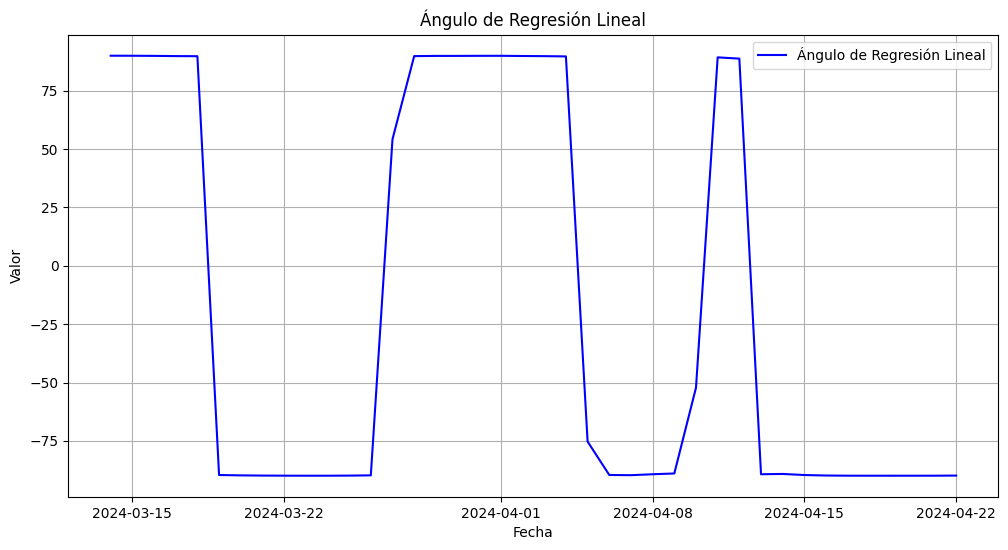

No se ha identificado una tendencia alcista persistente.
Se ha identificado una señal de compra en la fecha 2024-04-22 00:00:00


In [40]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt

# Función para descargar datos históricos de velas usando yfinance
def obtener_datos_velas(symbol, intervalo_tiempo, fecha_inicio, fecha_fin):
    df = yf.download(symbol, start=fecha_inicio, end=fecha_fin, interval=intervalo_tiempo)
    return df

# Función para calcular los indicadores de momentum y devolver los resultados en un DataFrame
def calcular_indicadores_momentum_df(datos_velas):
    close_prices = datos_velas['Close'].values

    # Calcular LINEARREG - Regresión Lineal
    linearreg = talib.LINEARREG(close_prices, timeperiod=14)

    # Calcular LINEARREG_ANGLE - Ángulo de Regresión Lineal
    linearreg_angle = talib.LINEARREG_ANGLE(close_prices, timeperiod=14)

    # Calcular LINEARREG_INTERCEPT - Intercepto de Regresión Lineal
    linearreg_intercept = talib.LINEARREG_INTERCEPT(close_prices, timeperiod=14)

    # Calcular LINEARREG_SLOPE - Pendiente de Regresión Lineal
    linearreg_slope = talib.LINEARREG_SLOPE(close_prices, timeperiod=14)

    # Calcular STDDEV - Desviación Estándar
    stddev = talib.STDDEV(close_prices, timeperiod=5, nbdev=1)

    # Calcular TSF - Pronóstico de Series Temporales
    tsf = talib.TSF(close_prices, timeperiod=14)

    # Calcular VAR - Varianza
    var = talib.VAR(close_prices, timeperiod=5, nbdev=1)

    # Crear un DataFrame con los resultados
    df_resultados = pd.DataFrame({
        'Regresión Lineal': linearreg,
        'Ángulo de Regresión Lineal': linearreg_angle,
        'Intercepto de Regresión Lineal': linearreg_intercept,
        'Pendiente de Regresión Lineal': linearreg_slope,
        'Desviación Estándar': stddev,
        'Pronóstico de Series Temporales': tsf,
        'Varianza': var
    }, index=datos_velas.index)

    return df_resultados

# Función para detectar tendencias y señales de trading
def detectar_tendencias_y_señales(df_resultados):
    # Graficar el ángulo de regresión lineal para detectar tendencias
    plt.figure(figsize=(12, 6))
    plt.plot(df_resultados.index, df_resultados['Ángulo de Regresión Lineal'], label='Ángulo de Regresión Lineal', color='blue')
    plt.title('Ángulo de Regresión Lineal')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Identificar tendencia alcista persistente
    ultimo_angulo = df_resultados['Ángulo de Regresión Lineal'].iloc[-1]
    if ultimo_angulo > 0:
        print("Se ha identificado una tendencia alcista persistente.")
    else:
        print("No se ha identificado una tendencia alcista persistente.")

    # Identificar señal de trading basada en el cruce de la línea de regresión lineal con el precio
    ultimo_precio = df_resultados['Regresión Lineal'].iloc[-1]
    ultimo_precio_cierre = df_resultados.index[-1]
    precio_cierre_anterior = df_resultados['Regresión Lineal'].iloc[-2]

    if ultimo_precio > precio_cierre_anterior:
        print("Se ha identificado una señal de compra en la fecha", ultimo_precio_cierre)
    elif ultimo_precio < precio_cierre_anterior:
        print("Se ha identificado una señal de venta en la fecha", ultimo_precio_cierre)
    else:
        print("No se ha identificado ninguna señal de trading.")

# Ejemplo de uso
if __name__ == "__main__":
    symbol = 'BTC-USD'  # Símbolo del activo
    intervalo_tiempo = '1d'  # Intervalo de tiempo deseado
    fecha_inicio = '2024-03-01'  # Fecha de inicio para los datos históricos
    fecha_fin = '2024-04-23'  # Fecha de fin para los datos históricos

    # Descargar datos históricos de velas usando yfinance
    datos_velas = obtener_datos_velas(symbol, intervalo_tiempo, fecha_inicio, fecha_fin)

    # Calcular los indicadores de momentum y obtener los resultados en un DataFrame
    df_resultados = calcular_indicadores_momentum_df(datos_velas)

    # Imprimir el DataFrame con los resultados
    print(df_resultados)

    # Detectar tendencias y señales de trading
    detectar_tendencias_y_señales(df_resultados)


In [48]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt

# Función para descargar datos históricos de velas usando yfinance
def obtener_datos_velas(symbol, intervalo_tiempo, fecha_inicio, fecha_fin):
    df = yf.download(symbol, start=fecha_inicio, end=fecha_fin, interval=intervalo_tiempo)
    return df

# Función para calcular los indicadores de momentum y devolver los resultados en un DataFrame
def calcular_indicadores_momentum_df(datos_velas):
    close_prices = datos_velas['Close'].values

    # Calcular LINEARREG - Regresión Lineal
    linearreg = talib.LINEARREG(close_prices, timeperiod=14)

    # Calcular LINEARREG_ANGLE - Ángulo de Regresión Lineal
    linearreg_angle = talib.LINEARREG_ANGLE(close_prices, timeperiod=14)

    # Calcular LINEARREG_INTERCEPT - Intercepto de Regresión Lineal
    linearreg_intercept = talib.LINEARREG_INTERCEPT(close_prices, timeperiod=14)

    # Calcular LINEARREG_SLOPE - Pendiente de Regresión Lineal
    linearreg_slope = talib.LINEARREG_SLOPE(close_prices, timeperiod=14)

    # Calcular STDDEV - Desviación Estándar
    stddev = talib.STDDEV(close_prices, timeperiod=5, nbdev=1)

    # Calcular TSF - Pronóstico de Series Temporales
    tsf = talib.TSF(close_prices, timeperiod=14)

    # Calcular VAR - Varianza
    var = talib.VAR(close_prices, timeperiod=5, nbdev=1)

    # Crear un DataFrame con los resultados
    df_resultados = pd.DataFrame({
        'Regresión Lineal': linearreg,
        'Ángulo de Regresión Lineal': linearreg_angle,
        'Intercepto de Regresión Lineal': linearreg_intercept,
        'Pendiente de Regresión Lineal': linearreg_slope,
        'Desviación Estándar': stddev,
        'Pronóstico de Series Temporales': tsf,
        'Varianza': var
    }, index=datos_velas.index)

    return df_resultados

# Función para detectar señales de trading
# Función para detectar señales de trading y devolver las fechas y señales detectadas
# Función para detectar señales de trading y devolver las fechas, señales y pronósticos detectados
def detectar_señales_trading(df_resultados):
    signals_with_forecast = []  # Lista para almacenar las señales detectadas con pronóstico

    # Pronóstico basado en las señales detectadas
    if df_resultados['Pronóstico de Series Temporales'].iloc[-1] > df_resultados['Pronóstico de Series Temporales'].iloc[-2]:
        forecast = "Alcista"
    else:
        forecast = "Bajista"

    # Señal 1: Desviación estándar alta
    if df_resultados['Desviación Estándar'].iloc[-1] > df_resultados['Desviación Estándar'].quantile(0.75):
        signals_with_forecast.append(("Señal 2", df_resultados.index[-1], forecast))

    # Señal 2: Ángulo de regresión lineal creciente
    if df_resultados['Ángulo de Regresión Lineal'].iloc[-1] > df_resultados['Ángulo de Regresión Lineal'].iloc[-2]:
        signals_with_forecast.append(("Señal 3", df_resultados.index[-1], forecast))

    # Señal 3: Pronóstico de series temporales ascendente
    if df_resultados['Pronóstico de Series Temporales'].iloc[-1] > df_resultados['Pronóstico de Series Temporales'].iloc[-2]:
        signals_with_forecast.append(("Señal 4", df_resultados.index[-1], forecast))

    # Señal 4: Varianza alta
    if df_resultados['Varianza'].iloc[-1] > df_resultados['Varianza'].quantile(0.75):
        signals_with_forecast.append(("Señal 5", df_resultados.index[-1], forecast))

    # Señal 5: Desviación estándar baja después de una alta
    if df_resultados['Desviación Estándar'].iloc[-1] < df_resultados['Desviación Estándar'].iloc[-2]:
        signals_with_forecast.append(("Señal 7", df_resultados.index[-1], forecast))

    # Señal 6: Pronóstico de series temporales descendente
    if df_resultados['Pronóstico de Series Temporales'].iloc[-1] < df_resultados['Pronóstico de Series Temporales'].iloc[-2]:
        signals_with_forecast.append(("Señal 8", df_resultados.index[-1], forecast))

    # Señal 7: Ángulo de regresión lineal decreciente
    if df_resultados['Ángulo de Regresión Lineal'].iloc[-1] < df_resultados['Ángulo de Regresión Lineal'].iloc[-2]:
        signals_with_forecast.append(("Señal 9", df_resultados.index[-1], forecast))

    # Señal 8: Varianza baja después de una alta
    if df_resultados['Varianza'].iloc[-1] < df_resultados['Varianza'].iloc[-2]:
        signals_with_forecast.append(("Señal 10", df_resultados.index[-1], forecast))

    return signals_with_forecast

# Ejemplo de uso
if __name__ == "__main__":
    symbol = 'BTC-USD'  # Símbolo del activo
    intervalo_tiempo = '1d'  # Intervalo de tiempo deseado
    fecha_inicio = '2024-03-01'  # Fecha de inicio para los datos históricos
    fecha_fin = '2024-04-23'  # Fecha de fin para los datos históricos

    # Descargar datos históricos de velas usando yfinance
    datos_velas = obtener_datos_velas(symbol, intervalo_tiempo, fecha_inicio, fecha_fin)

    # Calcular los indicadores de momentum y obtener los resultados en un DataFrame
    df_resultados = calcular_indicadores_momentum_df(datos_velas)

    # Imprimir el DataFrame con los resultados
    print(df_resultados)

    # Detectar señales de trading
    signals = detectar_señales_trading(df_resultados)

    # Obtener el pronóstico general
    last_forecast = signals[-1][2] if signals else None

    # Contar las señales alcistas y bajistas
    buy_signals = [signal for signal in signals if signal[0] in ["Señal 2", "Señal 3", "Señal 4", "Señal 5"]]
    sell_signals = [signal for signal in signals if signal[0] in ["Señal 7", "Señal 8", "Señal 9", "Señal 10"]]

    # Tomar decisiones de trading basadas en el pronóstico general y las señales individuales
    if last_forecast == "Alcista" and len(buy_signals) > len(sell_signals):
        print("¡Comprar!")
    elif last_forecast == "Bajista" and len(sell_signals) > len(buy_signals):
        print("¡Vender!")
    else:
        print("Esperar antes de tomar una decisión de trading.")


[*********************100%%**********************]  1 of 1 completed

            Regresión Lineal  Ángulo de Regresión Lineal  \
Date                                                       
2024-03-01               NaN                         NaN   
2024-03-02               NaN                         NaN   
2024-03-03               NaN                         NaN   
2024-03-04               NaN                         NaN   
2024-03-05               NaN                         NaN   
2024-03-06               NaN                         NaN   
2024-03-07               NaN                         NaN   
2024-03-08               NaN                         NaN   
2024-03-09               NaN                         NaN   
2024-03-10               NaN                         NaN   
2024-03-11               NaN                         NaN   
2024-03-12               NaN                         NaN   
2024-03-13               NaN                         NaN   
2024-03-14      72965.288728                   89.930303   
2024-03-15      72683.326339            

In [47]:
# Función para detectar señales de trading y devolver las fechas, señales y pronósticos detectados
def detectar_señales_trading(df_resultados):
    signals_with_forecast = []  # Lista para almacenar las señales detectadas con pronóstico

    # Pronóstico basado en las señales detectadas
    if df_resultados['Pronóstico de Series Temporales'].iloc[-1] > df_resultados['Pronóstico de Series Temporales'].iloc[-2]:
        forecast = "Alcista"
    else:
        forecast = "Bajista"

    # Señal 1: Desviación estándar alta
    if df_resultados['Desviación Estándar'].iloc[-1] > df_resultados['Desviación Estándar'].quantile(0.75):
        signals_with_forecast.append(("Señal 2", df_resultados.index[-1], forecast))

    # Señal 2: Ángulo de regresión lineal creciente
    if df_resultados['Ángulo de Regresión Lineal'].iloc[-1] > df_resultados['Ángulo de Regresión Lineal'].iloc[-2]:
        signals_with_forecast.append(("Señal 3", df_resultados.index[-1], forecast))

    # Señal 3: Pronóstico de series temporales ascendente
    if df_resultados['Pronóstico de Series Temporales'].iloc[-1] > df_resultados['Pronóstico de Series Temporales'].iloc[-2]:
        signals_with_forecast.append(("Señal 4", df_resultados.index[-1], forecast))

    # Señal 4: Varianza alta
    if df_resultados['Varianza'].iloc[-1] > df_resultados['Varianza'].quantile(0.75):
        signals_with_forecast.append(("Señal 5", df_resultados.index[-1], forecast))

    # Señal 5: Desviación estándar baja después de una alta
    if df_resultados['Desviación Estándar'].iloc[-1] < df_resultados['Desviación Estándar'].iloc[-2]:
        signals_with_forecast.append(("Señal 7", df_resultados.index[-1], forecast))

    # Señal 6: Pronóstico de series temporales descendente
    if df_resultados['Pronóstico de Series Temporales'].iloc[-1] < df_resultados['Pronóstico de Series Temporales'].iloc[-2]:
        signals_with_forecast.append(("Señal 8", df_resultados.index[-1], forecast))

    # Señal 7: Ángulo de regresión lineal decreciente
    if df_resultados['Ángulo de Regresión Lineal'].iloc[-1] < df_resultados['Ángulo de Regresión Lineal'].iloc[-2]:
        signals_with_forecast.append(("Señal 9", df_resultados.index[-1], forecast))

    # Señal 8: Varianza baja después de una alta
    if df_resultados['Varianza'].iloc[-1] < df_resultados['Varianza'].iloc[-2]:
        signals_with_forecast.append(("Señal 10", df_resultados.index[-1], forecast))

    return signals_with_forecast


In [49]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt

# Función para descargar datos históricos de velas usando yfinance
def obtener_datos_velas(symbol, intervalo_tiempo, fecha_inicio, fecha_fin):
    df = yf.download(symbol, start=fecha_inicio, end=fecha_fin, interval=intervalo_tiempo)
    return df

# Función para calcular los indicadores de momentum y devolver los resultados en un DataFrame
def calcular_indicadores_momentum_df(datos_velas):
    close_prices = datos_velas['Close'].values

    # Calcular LINEARREG - Regresión Lineal
    linearreg = talib.LINEARREG(close_prices, timeperiod=14)

    # Calcular LINEARREG_ANGLE - Ángulo de Regresión Lineal
    linearreg_angle = talib.LINEARREG_ANGLE(close_prices, timeperiod=14)

    # Calcular LINEARREG_INTERCEPT - Intercepto de Regresión Lineal
    linearreg_intercept = talib.LINEARREG_INTERCEPT(close_prices, timeperiod=14)

    # Calcular LINEARREG_SLOPE - Pendiente de Regresión Lineal
    linearreg_slope = talib.LINEARREG_SLOPE(close_prices, timeperiod=14)

    # Calcular STDDEV - Desviación Estándar
    stddev = talib.STDDEV(close_prices, timeperiod=5, nbdev=1)

    # Calcular TSF - Pronóstico de Series Temporales
    tsf = talib.TSF(close_prices, timeperiod=14)

    # Calcular VAR - Varianza
    var = talib.VAR(close_prices, timeperiod=5, nbdev=1)

    # Crear un DataFrame con los resultados
    df_resultados = pd.DataFrame({
        'Regresión Lineal': linearreg,
        'Ángulo de Regresión Lineal': linearreg_angle,
        'Intercepto de Regresión Lineal': linearreg_intercept,
        'Pendiente de Regresión Lineal': linearreg_slope,
        'Desviación Estándar': stddev,
        'Pronóstico de Series Temporales': tsf,
        'Varianza': var
    }, index=datos_velas.index)

    return df_resultados

# Función para asignar pesos a las señales
def asignar_pesos_a_señales(signals):
    # Se asignan pesos a las señales
    weights = {
        "Señal 2": 1,
        "Señal 3": 1,
        "Señal 4": 1,
        "Señal 5": 1,
        "Señal 7": -1,
        "Señal 8": -1,
        "Señal 9": -1,
        "Señal 10": -1
    }

    weighted_signals = [(signal[0], signal[1], signal[2], weights[signal[0]]) for signal in signals]

    return weighted_signals

# Función para detectar señales de trading
def detectar_señales_trading(df_resultados):
    signals_with_forecast = []  # Lista para almacenar las señales detectadas con pronóstico

    # Pronóstico basado en las señales detectadas
    if df_resultados['Pronóstico de Series Temporales'].iloc[-1] > df_resultados['Pronóstico de Series Temporales'].iloc[-2]:
        forecast = "Alcista"
    else:
        forecast = "Bajista"

    # Señal 1: Desviación estándar alta
    if df_resultados['Desviación Estándar'].iloc[-1] > df_resultados['Desviación Estándar'].quantile(0.75):
        signals_with_forecast.append(("Señal 2", df_resultados.index[-1], forecast))

    # Señal 2: Ángulo de regresión lineal creciente
    if df_resultados['Ángulo de Regresión Lineal'].iloc[-1] > df_resultados['Ángulo de Regresión Lineal'].iloc[-2]:
        signals_with_forecast.append(("Señal 3", df_resultados.index[-1], forecast))

    # Señal 3: Pronóstico de series temporales ascendente
    if df_resultados['Pronóstico de Series Temporales'].iloc[-1] > df_resultados['Pronóstico de Series Temporales'].iloc[-2]:
        signals_with_forecast.append(("Señal 4", df_resultados.index[-1], forecast))

    # Señal 4: Varianza alta
    if df_resultados['Varianza'].iloc[-1] > df_resultados['Varianza'].quantile(0.75):
        signals_with_forecast.append(("Señal 5", df_resultados.index[-1], forecast))

    # Señal 5: Desviación estándar baja después de una alta
    if df_resultados['Desviación Estándar'].iloc[-1] < df_resultados['Desviación Estándar'].iloc[-2]:
        signals_with_forecast.append(("Señal 7", df_resultados.index[-1], forecast))

    # Señal 6: Pronóstico de series temporales descendente
    if df_resultados['Pronóstico de Series Temporales'].iloc[-1] < df_resultados['Pronóstico de Series Temporales'].iloc[-2]:
        signals_with_forecast.append(("Señal 8", df_resultados.index[-1], forecast))

    # Señal 7: Ángulo de regresión lineal decreciente
    if df_resultados['Ángulo de Regresión Lineal'].iloc[-1] < df_resultados['Ángulo de Regresión Lineal'].iloc[-2]:
        signals_with_forecast.append(("Señal 9", df_resultados.index[-1], forecast))

    # Señal 8: Varianza baja después de una alta
    if df_resultados['Varianza'].iloc[-1] < df_resultados['Varianza'].iloc[-2]:
        signals_with_forecast.append(("Señal 10", df_resultados.index[-1], forecast))

    return signals_with_forecast

# Función para evaluar las señales y generar un pronóstico general
def evaluar_pronostico_general(signals_with_weights):
    # Calcular el pronóstico general basado en las señales ponderadas
    total_weight = sum(weight for _, _, _, weight in signals_with_weights)
    forecast_score = sum(weight for _, _, _, weight in signals_with_weights if weight > 0)

    if total_weight == 0:
        return "Esperar antes de tomar una decisión de trading."

    if forecast_score > 0:
        return "¡Comprar!"
    elif forecast_score < 0:
        return "¡Vender!"
    else:
        return "Esperar antes de tomar una decisión de trading."

# Ejemplo de uso
if __name__ == "__main__":
    symbol = 'BTC-USD'  # Símbolo del activo
    intervalo_tiempo = '1d'  # Intervalo de tiempo deseado
    fecha_inicio = '2024-03-01'  # Fecha de inicio para los datos históricos
    fecha_fin = '2024-04-23'  # Fecha de fin para los datos históricos

    # Descargar datos históricos de velas usando yfinance
    datos_velas = obtener_datos_velas(symbol, intervalo_tiempo, fecha_inicio, fecha_fin)

    # Calcular los indicadores de momentum y obtener los resultados en un DataFrame
    df_resultados = calcular_indicadores_momentum_df(datos_velas)

    # Imprimir el DataFrame con los resultados
    print(df_resultados)

    # Detectar señales de trading
    signals = detectar_señales_trading(df_resultados)

    # Asignar pesos a las señales
    weighted_signals = asignar_pesos_a_señales(signals)

    # Evaluar el pronóstico general
    pronostico_general = evaluar_pronostico_general(weighted_signals)

    # Imprimir el pronóstico general
    print(pronostico_general)


[*********************100%%**********************]  1 of 1 completed

            Regresión Lineal  Ángulo de Regresión Lineal  \
Date                                                       
2024-03-01               NaN                         NaN   
2024-03-02               NaN                         NaN   
2024-03-03               NaN                         NaN   
2024-03-04               NaN                         NaN   
2024-03-05               NaN                         NaN   
2024-03-06               NaN                         NaN   
2024-03-07               NaN                         NaN   
2024-03-08               NaN                         NaN   
2024-03-09               NaN                         NaN   
2024-03-10               NaN                         NaN   
2024-03-11               NaN                         NaN   
2024-03-12               NaN                         NaN   
2024-03-13               NaN                         NaN   
2024-03-14      72965.288728                   89.930303   
2024-03-15      72683.326339            